In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

In [2]:
df =  pd.read_csv('filtered_comprehensive.csv')

Index(['Unnamed: 0.3', 'Unnamed: 0.2', 'Unnamed: 0', 'Unnamed: 1',
       'Unnamed: 0.1', 'title_x', 'artist_x', 'year_x', 'key', 'Unnamed: 0_x',
       'url', 'WeekID', 'Week Position', 'Song', 'Performer', 'SongID',
       'Instance', 'Previous Week Position', 'Peak Position', 'Weeks on Chart',
       'Lyrics', 'Artist', 'words', 'wordCount', 'languages', 'all_words',
       'allWordCount', 'year_y', 'decade', 'MTLD', 'TTR', 'CTTR',
       'sentimentScore', 'sentimentScore_pos', 'sentimentScore_neg',
       'emo_words', 'emoWordCount', 'joy', 'joy_normalized', 'sadness',
       'sadness_normalized', 'anger', 'anger_normalized', 'disgust',
       'disgust_normalized', 'trust', 'trust_normalized', 'anticipation',
       'anticipation_normalized', 'fear', 'fear_normalized', 'surprise',
       'surprise_normalized', 'emo_score', 'happy', 'happy_normalized',
       'sorrow', 'sorrow_normalized', 'year', 'lower_title', 'Unnamed: 0_y',
       'title_y', 'artist_y', 'chartmetric_id', 'name',

In [3]:
extractf = df[['year_x','processed_tokens']]
extractf['decade'] = extractf['year_x'].apply(lambda x : str(x)[2]+'0s')
extractf['decade'].isna().sum()

/var/folders/lk/c66jcxc517j4m73kkh93rvwr0000gn/T/ipykernel_83767/2985959004.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  extractf['decade'] = extractf['year_x'].apply(lambda x : str(x)[2]+'0s')


0

In [4]:
extractf['tokens_list'] = extractf['processed_tokens'].apply(lambda x: x.strip('][').split(', '))

/var/folders/lk/c66jcxc517j4m73kkh93rvwr0000gn/T/ipykernel_83767/46247178.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  extractf['tokens_list'] = extractf['processed_tokens'].apply(lambda x: x.strip('][').split(', '))


In [5]:
concat_tokens = extractf.groupby(by=['decade'])
# .agg({'tokens_list': 'sum'})
concat_tokens.get_group('00s')


year_x                                   processed_tokens decade  \
15682    2000  ['every', 'time', 'eye', 'meet', 'feeling', 'i...    00s   
15683    2000  ['monday', 'night', 'feel', 'low', 'count', 'h...    00s   
15684    2000  ['fall', 'along', 'way', 'pick', 'dust', 'get'...    00s   
15685    2000  ['come', 'come', 'baby', 'come', 'come', 'baby...    00s   
15686    2000  ['matter', 'matter', 'matter', 'matter', 'frie...    00s   
...       ...                                                ...    ...   
18654    2009  ['told', 'need', 'talk', 'cause', 'late', 'pro...    00s   
18655    2009  ['war', 'world', 'try', 'pull', 'dark', 'strug...    00s   
18656    2009  ['yeah', 'yeah', 'came', 'door', 'checked', 'c...    00s   
18657    2009  ['get', 'work', 'friday', 'working', 'like', '...    00s   
18658    2009  ['timbaland', 'wanna', 'talk', 'wanna', 'hear'...    00s   

                                             tokens_list  
15682  ['every', 'time', 'eye', 'meet', 'feeling', 'i...  
15683  ['monday', 'night', 'feel', 'low', 'count', 'h...  
15684  ['fall', 'along', 'way', 'pick', 'dust', 'get'...  
15685  ['come', 'come', 'baby', 'come', 'come', 'baby...  
15686  ['matter', 'matter', 'matter', 'matter', 'frie...  
...                                                  ...  
18654  ['told', 'need', 'talk', 'cause', 'late', 'pro...  
18655  ['war', 'world', 'try', 'pull', 'dark', 'strug...  
18656  ['yeah', 'yeah', 'came', 'door', 'checked', 'c...  
18657  ['get', 'work', 'friday', 'working', 'like', '...  
18658  ['timbaland', 'wanna', 'talk', 'wanna', 'hear'...  

[2977 rows x 4 columns]

In [6]:
concat_tokens = concat_tokens.agg({'tokens_list': 'sum'})

In [7]:
concat_tokens

tokens_list
decade                                                   
00s     ['every', 'time', 'eye', 'meet', 'feeling', 'i...
10s     ['ludacris', 'luda', 'may', 'worst', 'best', '...
20s     ['yeah', 'tryna', 'call', 'long', 'enough', 'm...
50s     ['come', 'softly', 'lyricsdoo', 'dooby', 'doo'...
60s     ['oopoop', 'oop', 'oopoop', 'alleyoop', 'oop',...
70s     ['bird', 'suddenly', 'appear', 'every', 'time'...
80s     ['produced', 'john', 'lennon', 'yoko', 'ono', ...
90s     ['come', 'mmm', 'like', 'angel', 'seems', 'lik...

In [8]:
concat_tokens['token_set'] = concat_tokens['tokens_list'].apply(set)

In [9]:
concat_tokens['set_size'] = concat_tokens['token_set'].apply(lambda x: len(x))

In [10]:
concat_tokens

tokens_list  \
decade                                                      
00s     ['every', 'time', 'eye', 'meet', 'feeling', 'i...   
10s     ['ludacris', 'luda', 'may', 'worst', 'best', '...   
20s     ['yeah', 'tryna', 'call', 'long', 'enough', 'm...   
50s     ['come', 'softly', 'lyricsdoo', 'dooby', 'doo'...   
60s     ['oopoop', 'oop', 'oopoop', 'alleyoop', 'oop',...   
70s     ['bird', 'suddenly', 'appear', 'every', 'time'...   
80s     ['produced', 'john', 'lennon', 'yoko', 'ono', ...   
90s     ['come', 'mmm', 'like', 'angel', 'seems', 'lik...   

                                                token_set  set_size  
decade                                                               
00s     {'moanin', 'lineman', 'kan', 'interlude', 'cli...     18373  
10s     {'moanin', 'kan', 'bounced', 'asstrology', 'mo...     22101  
20s     {'moanin', 'kan', 'interlude', 'swear', 'himyo...     15049  
50s     {'shoulder', 'trader', 'proving', 'intro', 'ho...      3989  
60s     {'moanin', 'lineman', 'staggered', 'interlude'...     16237  
70s     {'moanin', 'staggered', 'interlude', 'author',...     14837  
80s     {'interlude', 'author', 'swear', 'fizzy', 'rip...     14026  
90s     {'moanin', 'palio', 'tames', 'interlude', 'sta...     16424

In [21]:
concat_tokens_2 = concat_tokens.reindex(['60s','70s','80s','90s','00s','10s'])
concat_tokens_2


tokens_list  \
decade                                                      
60s     ['oopoop', 'oop', 'oopoop', 'alleyoop', 'oop',...   
70s     ['bird', 'suddenly', 'appear', 'every', 'time'...   
80s     ['produced', 'john', 'lennon', 'yoko', 'ono', ...   
90s     ['come', 'mmm', 'like', 'angel', 'seems', 'lik...   
00s     ['every', 'time', 'eye', 'meet', 'feeling', 'i...   
10s     ['ludacris', 'luda', 'may', 'worst', 'best', '...   

                                                token_set  set_size  
decade                                                               
60s     {'moanin', 'lineman', 'staggered', 'interlude'...     16237  
70s     {'moanin', 'staggered', 'interlude', 'author',...     14837  
80s     {'interlude', 'author', 'swear', 'fizzy', 'rip...     14026  
90s     {'moanin', 'palio', 'tames', 'interlude', 'sta...     16424  
00s     {'moanin', 'lineman', 'kan', 'interlude', 'cli...     18373  
10s     {'moanin', 'kan', 'bounced', 'asstrology', 'mo...     22101

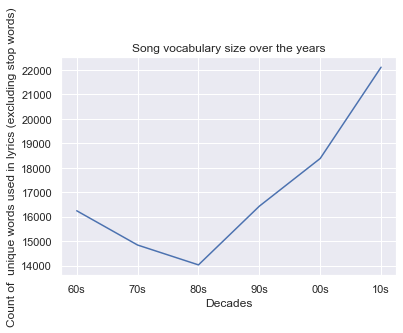

In [22]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_theme(style="darkgrid")
sns.lineplot(data=concat_tokens_2, x="decade", y="set_size", markers=True, dashes=False)
plt.xlabel('Decades')
plt.ylabel('Count of  unique words used in lyrics (excluding stop words)')
 
# title of plot
plt.title('Song vocabulary size over the years')

plt.savefig('vocab-size-decades-filtered.png', dpi=300)

In [23]:
tldf = concat_tokens['tokens_list']

In [24]:
tldf

decade
50s    ['come', 'softly', 'lyricsdoo', 'dooby', 'doo'...
60s    ['oopoop', 'oop', 'oopoop', 'alleyoop', 'oop',...
70s    ['bird', 'suddenly', 'appear', 'every', 'time'...
80s    ['produced', 'john', 'lennon', 'yoko', 'ono', ...
90s    ['come', 'mmm', 'like', 'angel', 'seems', 'lik...
00s    ['every', 'time', 'eye', 'meet', 'feeling', 'i...
10s    ['ludacris', 'luda', 'may', 'worst', 'best', '...
20s    ['yeah', 'tryna', 'call', 'long', 'enough', 'm...
Name: tokens_list, dtype: object

In [35]:
from collections import defaultdict
def freq_dict(words):
    fq = defaultdict( int )
    for w in words:
        w = w.replace("'",'')
        fq[w] += 1
    return fq


In [28]:
from wordcloud import WordCloud
wordcloud = WordCloud(width=1600, height=800)

In [29]:
decades = ['50s', '60s','70s','80s','90s','00s','10s', '20s']

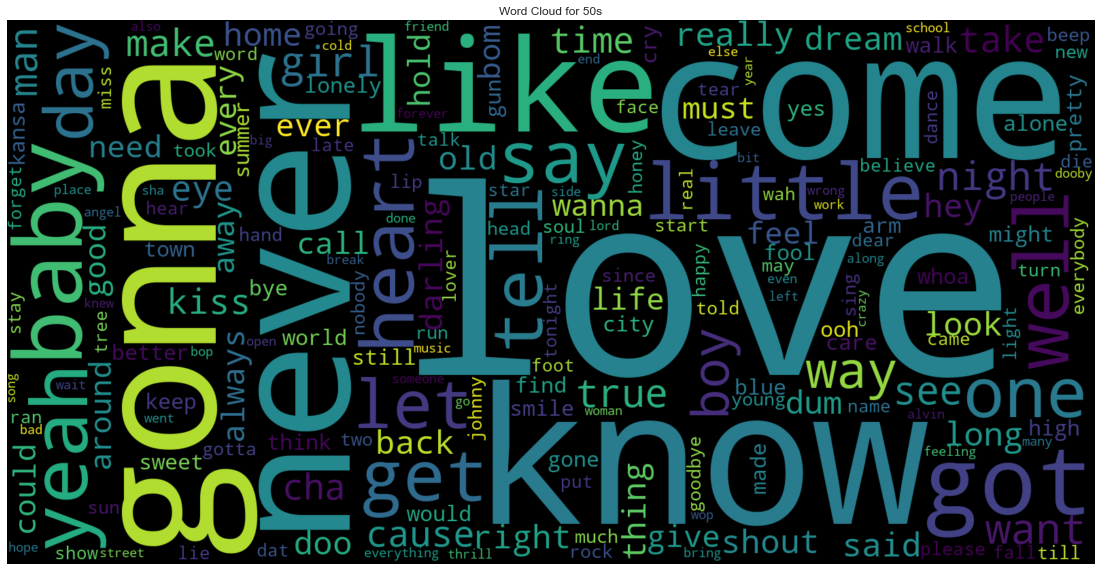

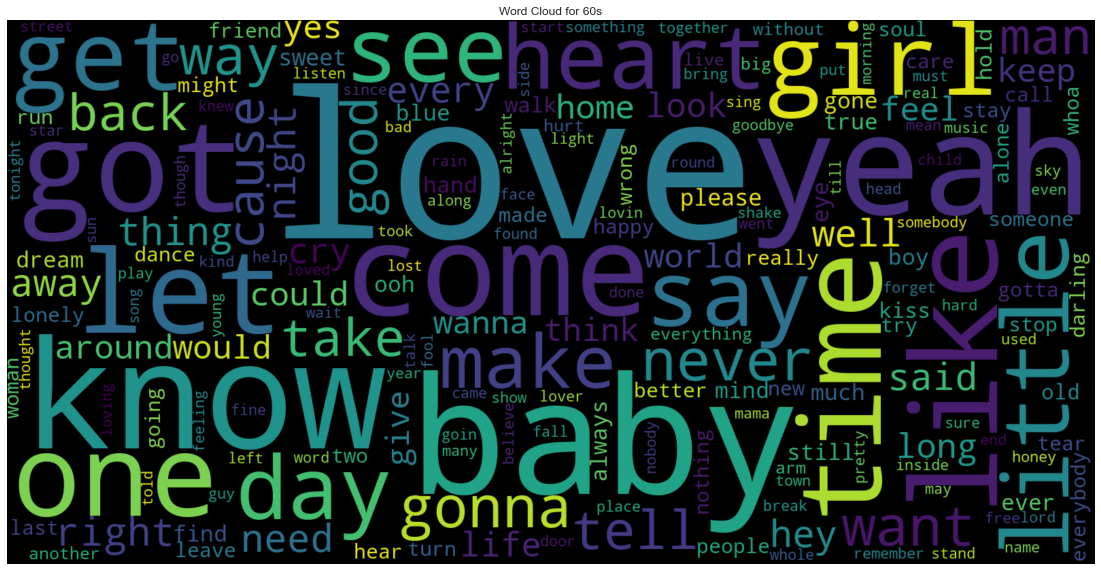

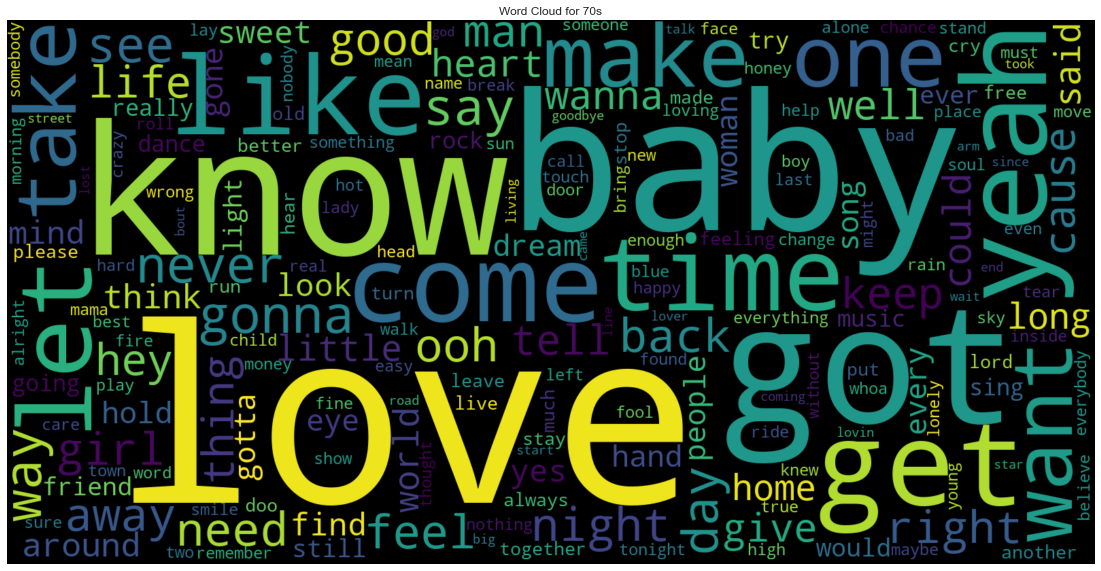

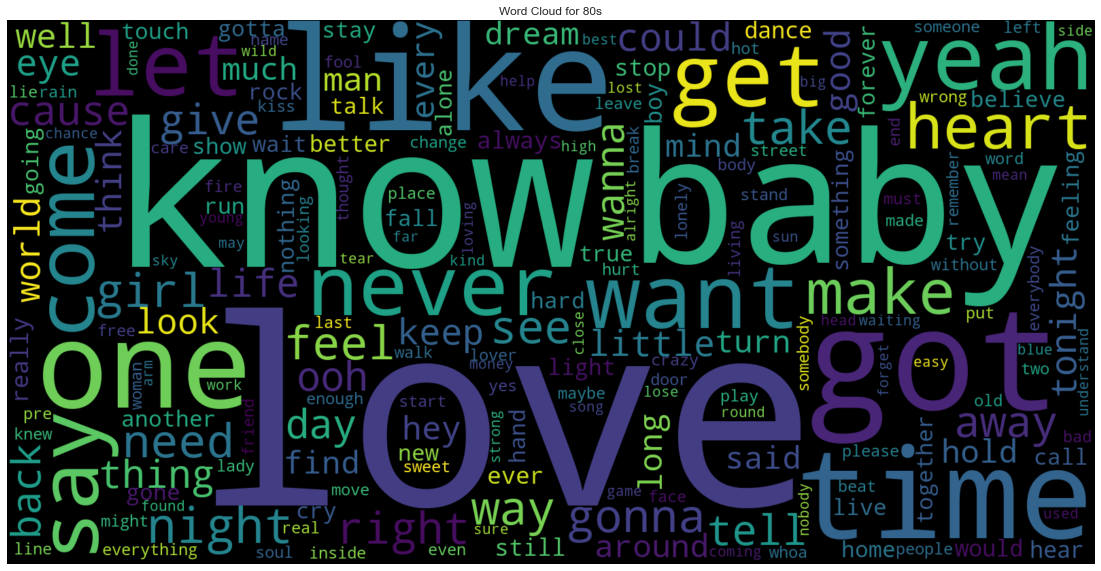

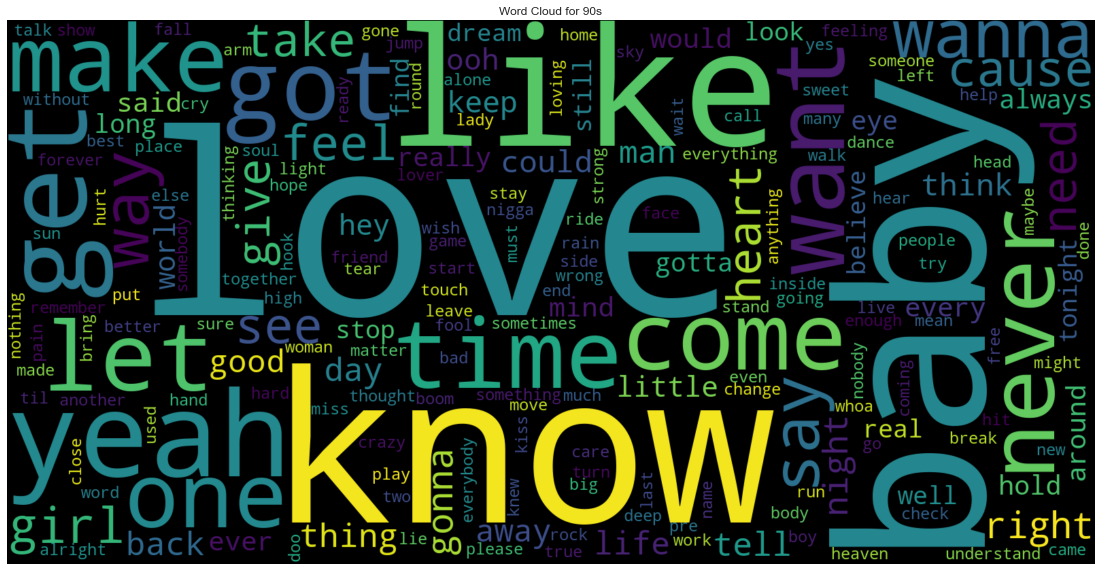

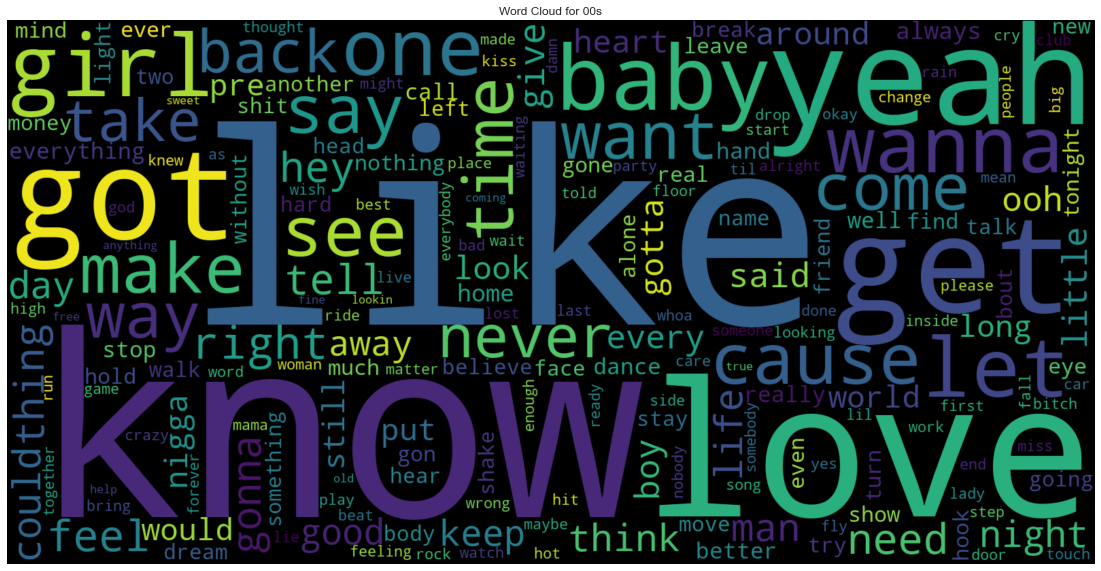

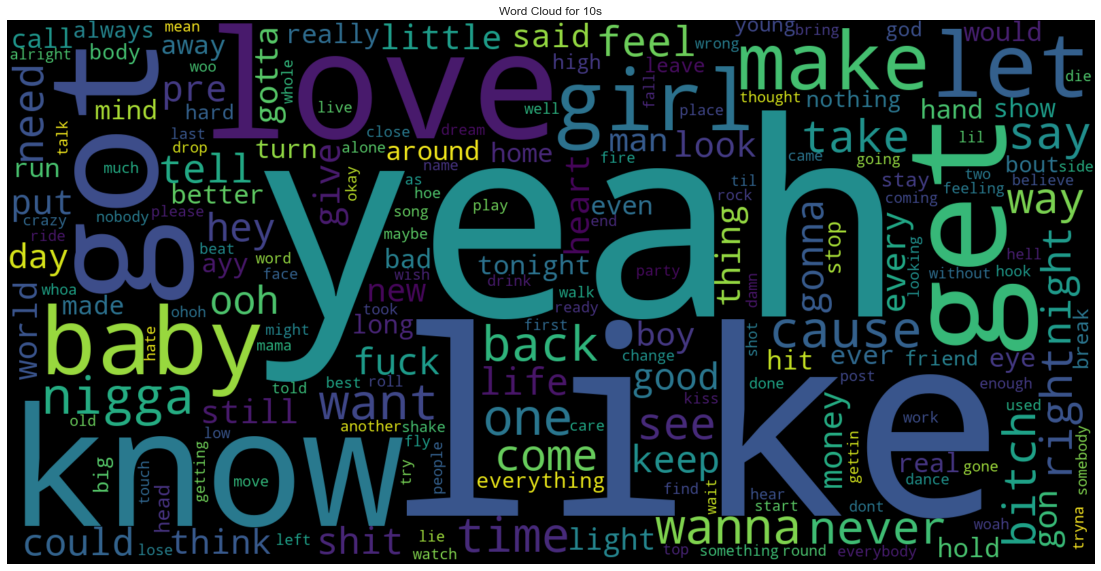

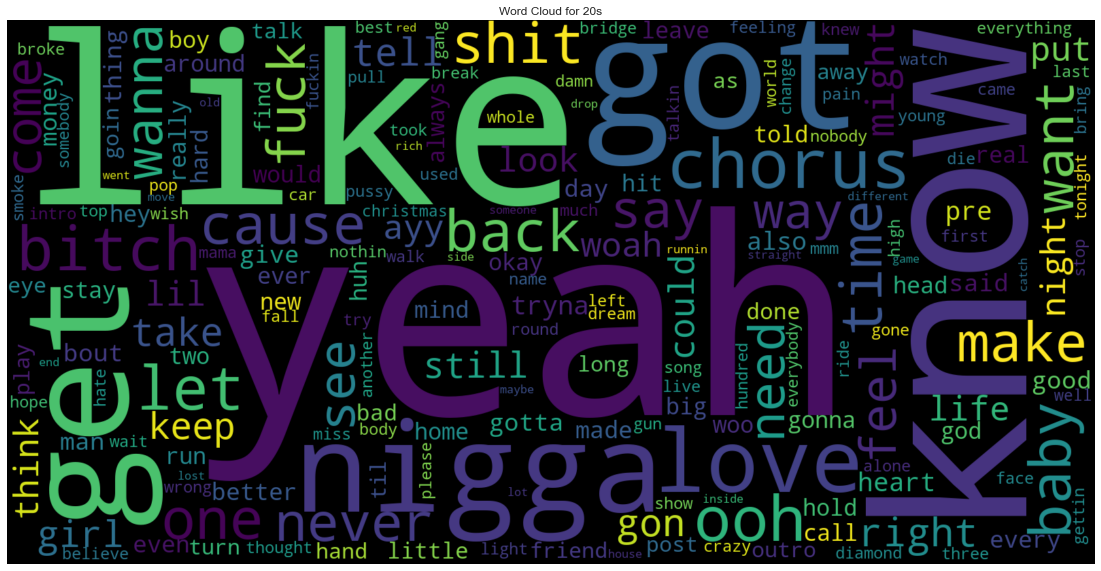

In [36]:
for decade in decades:
        try:
            fq = concat_tokens.loc[decade][0]
            fq2 = freq_dict(fq)
            wordcloud.generate_from_frequencies(frequencies=fq2)
            plt.figure( figsize=(20,10) )
            plt.tight_layout(pad=0)
            plt.imshow(wordcloud, interpolation="bilinear")
            plt.axis("off")
            plt.title("Word Cloud for "+decade)
            # plt.show()
            plt.savefig(decade+"-overall"+'.png', dpi=300, bbox_inches='tight')
        except Exception as e:
            print(e)
            print("Unsuccesful",decade)

In [79]:
decadal_groups = extractf.groupby(by=['decade']).agg('topic_x')
print(decadal_groups)

In [80]:
decade_topic = extractf.groupby(by='decade')[['decade','topic_x']]
decade_topic

In [81]:
decades = extractf['decade'].unique()
decades

array(['50s', '60s', '70s', '80s', '90s', '00s', '10s', '20s'],
      dtype=object)

In [86]:
decade_df = decade_topic.get_group('00s')
decades_final = decade_df.pivot_table(index="topic_x", columns="decade", values="topic_x", aggfunc=np.count_nonzero)
decade_df.head()
decades_final.loc['T1']

decade
00s    72
Name: T1, dtype: int64

In [92]:
topic_counts =[[],[],[],[]]
for i in range(len(topic_options)):
    print(topic_options[i], topic_counts[i])
for decade in decades:
    # print(decade)
    decade_df = decade_topic.get_group(decade)
    # print(decade_df)
    decades_final = decade_df.pivot_table(index="topic_x", columns="decade", values="topic_x", aggfunc=np.count_nonzero)
    for i in range(len(topic_options)):
        try:
            topic_counts[i].append(int(decades_final.loc[topic_options[i]])) 
        except:
            topic_counts[i].append(0) 
for i in range(len(topic_options)):
    print(topic_options[i], topic_counts[i])

T1 []
T2 []
T3 []
T4 []
T1 [0, 50, 80, 46, 30, 72, 138, 48]
T2 [0, 24, 16, 30, 62, 272, 310, 142]
T3 [2, 122, 166, 232, 258, 474, 566, 234]
T4 [2, 62, 98, 136, 154, 172, 290, 62]


In [93]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

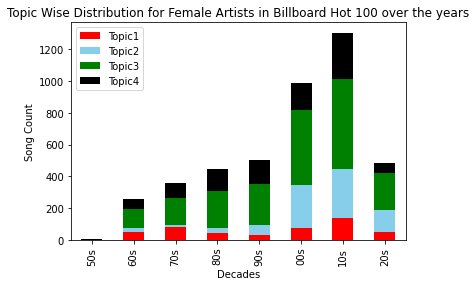

In [95]:
df = pd.DataFrame({'Topic1': topic_counts[0],
                   'Topic2': topic_counts[1],
                   'Topic3': topic_counts[2],
                   'Topic4': topic_counts[3]},
                  index=decades)
                  # create stacked bar chart for monthly temperatures
df.plot(kind='bar', stacked=True, color=['red', 'skyblue', 'green','black'])
 
# labels for x & y axis
plt.xlabel('Decades')
plt.ylabel('Song Count')
 
# title of plot
plt.title('Topic Wise Distribution for Female Artists in Billboard Hot 100 over the years')

plt.savefig('female-topics-decades.png', dpi=300)

/var/folders/lk/c66jcxc517j4m73kkh93rvwr0000gn/T/ipykernel_75555/1514977819.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_perct['Topic1'] = df['Topic1']*100/df['total']
/var/folders/lk/c66jcxc517j4m73kkh93rvwr0000gn/T/ipykernel_75555/1514977819.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_perct['Topic2'] = df['Topic2']*100/df['total']
/var/folders/lk/c66jcxc517j4m73kkh93rvwr0000gn/T/ipykernel_75555/1514977819.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice 

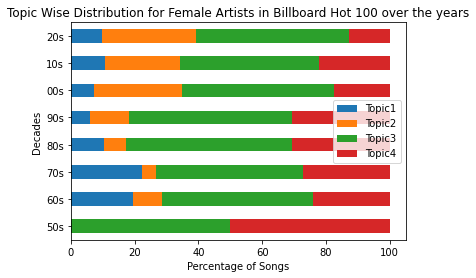

In [97]:
df['total'] =  df['Topic1'] + df['Topic2'] + df['Topic3'] + df['Topic4']
df_perct = df[['Topic1','Topic2','Topic3', 'Topic4']]
df_perct['Topic1'] = df['Topic1']*100/df['total']
df_perct['Topic2'] = df['Topic2']*100/df['total']
df_perct['Topic3'] = df['Topic3']*100/df['total']
df_perct['Topic4'] = 100 - df_perct['Topic1'] - df_perct['Topic2'] - df_perct['Topic3']
df_perct.plot(
    kind = 'barh',
    stacked = True,
    title = 'Stacked Bar Graph',
    mark_right = True)
df_perct

# labels for x & y axis
plt.ylabel('Decades')
plt.xlabel('Percentage of Songs')
 
# title of plot
plt.title('Topic Wise Distribution for Female Artists in Billboard Hot 100 over the years')

plt.savefig('female-topics-decades-perct.png', dpi=300)

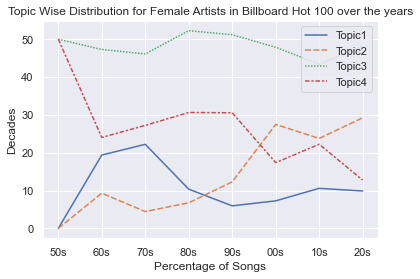

In [98]:
import seaborn as sns
sns.set_theme(style="darkgrid")
sns.lineplot(data=df_perct)
# labels for x & y axis
# labels for x & y axis
plt.ylabel('Decades')
plt.xlabel('Percentage of Songs')
 
# title of plot
plt.title('Topic Wise Distribution for Female Artists in Billboard Hot 100 over the years')

plt.savefig('female-topics-decades-perct-line.png', dpi=300)